In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }
df=pd.DataFrame(candidates,columns=['gmat','gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [ ]:
df.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             40 non-null     int64  
 1   gpa              40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   admitted         40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [ ]:
df.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


In [ ]:
df.dtypes

gmat                 int64
gpa                float64
work_experience      int64
admitted             int64
dtype: object

In [ ]:
#outlier detection
percent25=df['gmat'].quantile(0.25)
percent75=df['gmat'].quantile(0.75)
iqr=percent75-percent25
print(iqr)


82.5


In [ ]:
min=percent25 -(iqr*1.5)
max=percent75+(iqr*1.5)
print("minimum  value:",min)
print("maximum value:" ,max)

minimum  value: 483.75
maximum value: 813.75


In [ ]:
percen25=df['gpa'].quantile(0.25)
percen75=df['gpa'].quantile(0.75)
Iqr=percen75-percen25
print(Iqr)

1.0


In [ ]:
q3=percen75+(1.5*Iqr)
q1=percen25-(1.5*Iqr)
print('max:',q3)
print('min:',q1)

max: 5.2
min: 1.2000000000000002


In [ ]:
df.drop_duplicates()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


no outliers

**EDA**

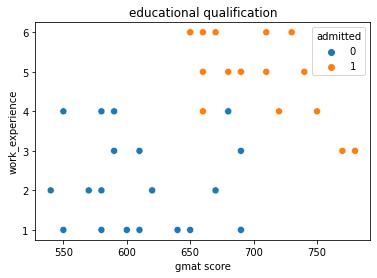

In [ ]:
plt.figure()
sns.scatterplot(x='gmat',y='work_experience',hue='admitted',data=df,s=50)
plt.title("educational qualification")
plt.xlabel("gmat score")
plt.ylabel("work_experience")
plt.show()

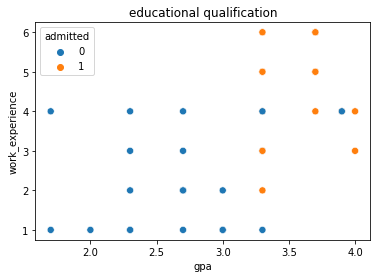

In [ ]:
plt.figure()
sns.scatterplot(x='gpa',y='work_experience',hue='admitted',data=df,s=50)
plt.title("educational qualification")
plt.xlabel("gpa")
plt.ylabel("work_experience")
plt.show()

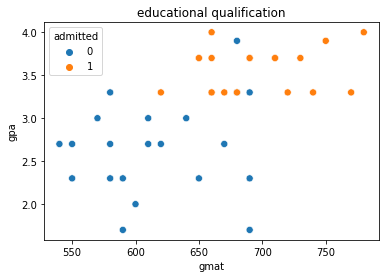

In [ ]:
plt.figure()
sns.scatterplot(x='gmat',y='gpa',hue='admitted',data=df,s=50)
plt.title("educational qualification")
plt.xlabel("gmat")
plt.ylabel("gpa")
plt.show()

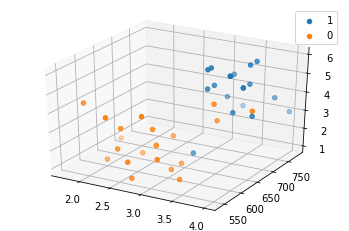

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
for s in df.admitted.unique():
  ax.scatter(df.gpa[df.admitted==s],df.gmat[df.admitted==s],df.work_experience[df.admitted==s],label=s)

ax.legend()

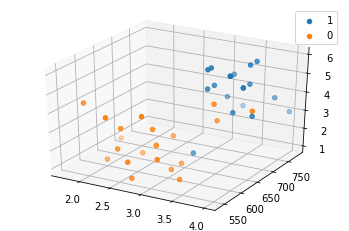

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
for s in df.admitted.unique():
  ax.scatter(df['gpa'][df.admitted==s],df['gmat'][df.admitted==s],df['work_experience'][df.admitted==s],label=s)

ax.legend()


In [ ]:
x=df[['gmat','gpa','work_experience']].values
y=df['admitted'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred=regressor.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
regressor.predict([[750,3,4]])        #not admitted

array([1])

In [ ]:
regressor.predict_proba([[750,3,5]])           # class 0 and class 1 probability

array([[0.01032854, 0.98967146]])

In [ ]:
regressor.predict_proba(x_test)     # class 0 na not admitted and class 1 na admitted

array([[0.98884159, 0.01115841],
       [0.98200489, 0.01799511],
       [0.03717722, 0.96282278],
       [0.21374624, 0.78625376],
       [0.96805619, 0.03194381],
       [0.9973502 , 0.0026498 ],
       [0.05672066, 0.94327934],
       [0.05277677, 0.94722323]])

In [ ]:
regressor.coef_

array([[0.03599347, 0.69229994, 1.36349895]])

In [ ]:
regressor.intercept_

array([-31.32703489])

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve,roc_auc_score,confusion_matrix,f1_score
regressor.score(x_test,y_test)  # accuracy

0.75

In [ ]:
confusion_matrix(y_test,y_pred)

array([[3, 1],
       [1, 3]])

In [ ]:
f1_score(y_test,y_pred) #f1_score

0.75

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


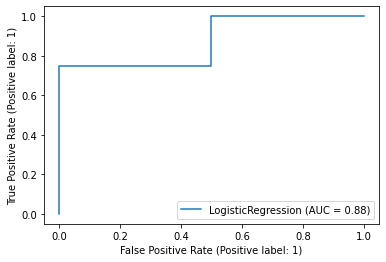

In [ ]:
plot_roc_curve(regressor,x_test,y_test)  #auroc

The range of AUROC score is from 0-1.

Our model has an AUROC score of 0.88, which is a very good indication of a good model.